In [7]:
!pip install yfinance
%pip install pandas
%pip install seaborn
%pip install python-binance

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 519.9 kB/s eta 0:00:00 kB/s eta 0:00:01:01
  Using cached matplotlib-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached contourpy-1.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (300 kB)
  Using cached Pillow-9.5.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.4 MB)
  Using cached fonttools-4.39.4-py3-none-any.whl (1.0 MB)
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 KB 284.3 kB/s eta 0:00:001m273.1 kB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 KB 707.2 kB/s eta 0:00:00 kB/s eta 0:00:01:01
  Using cached aiohttp-3.8.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 1.1 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.9 MB/s eta 0:00:002.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 KB 4.9 MB/s eta 0:00:00
  Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
  Using cached yarl-1.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (268 kB)
  Using cached frozenlist-1.3.3-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (149 kB)
  Using cached multidict-6.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (114 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 770.4/770.4 KB 6.4 MB/s eta 0:0

In [15]:
import yfinance as yf
from binance import Client
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tools.indicators import *

In [42]:
# Setting up the GLOBAL data
API_KEY = "VWXblr7OSzcR9BsHHLK5hAGFG3bTwcikuyVYTNdODa1Q9SvpZDxI2vWbhvohAJRF"
SECRET_KEY = "rQXVeQKqepDPm01XAyFK9ROsEPkWVgAIPA0NTYlxdyW2ayEARelVgkW9SQZmDkzi"

INTERVAL_MINUTE = Client.KLINE_INTERVAL_1MINUTE
INTERVAL_WEEK = Client.KLINE_INTERVAL_1WEEK
INTERVAL_HOUR = Client.KLINE_INTERVAL_1HOUR
INTERVAL_DAY = Client.KLINE_INTERVAL_1DAY

SYMBOLS = [
    'BTCUSDT','ETHUSDT','LUNAUSDT','SOLUSDT','UNIUSDT','AVAXUSDT','QNTUSDT'
    ,'BNBUSDT','GALAUSDT','XRPUSDT','SHIBUSDT','ENJUSDT','DOTUSDT','SANDUSDT'
    ,'DOGEUSDT','VETUSDT','NEARUSDT','ONEUSDT','XLMUSDT','MANAUSDT','TRXUSDT'
    ,'XTZUSDT','BCHUSDT','FILUSDT','ATOMUSDT','KLAYUSDT','AAVEUSDT','HNTUSDT'
    ,'EGLDUSDT','ADAUSDT','LINKUSDT','MATICUSDT','EOSUSDT','THETAUSDT','LTCUSDT'
    ,'NEOUSDT','ETCUSDT','XMRUSDT','TFUELUSDT','FTMUSDT','ALGOUSDT','HBARUSDT'
    ,'FTTUSDT','MKRUSDT','AXSUSDT','GRTUSDT','CAKEUSDT','ICPUSDT','FLOWUSDT','XECUSDT'
]

In [4]:
client = Client(API_KEY, SECRET_KEY) # Connexion to binance

In [65]:
def getminutedata(symbol, interval, lookback):
    frame = pd.DataFrame(client.get_historical_klines(symbol,interval,f"{lookback}"))
    frame = frame[[0,1,2,3,4]]
    frame.columns = ["Time","Open","High","Low","Close"]
    frame = frame.set_index("Time")
    frame.index = pd.to_datetime(frame.index,unit="ms")
    frame = frame.astype("float")
    
    return frame

In [45]:
def draw_graph(data,y_label="Close"):
    sns.set(style='darkgrid')
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=data.index, y=data[y_label])
    plt.title('Graphique')
    plt.xlabel('Date')
    plt.ylabel('Valeur')
    plt.show()

In [66]:
btc_data = getminutedata("BTCUSDT",INTERVAL_DAY,"01 Jan, 2023")

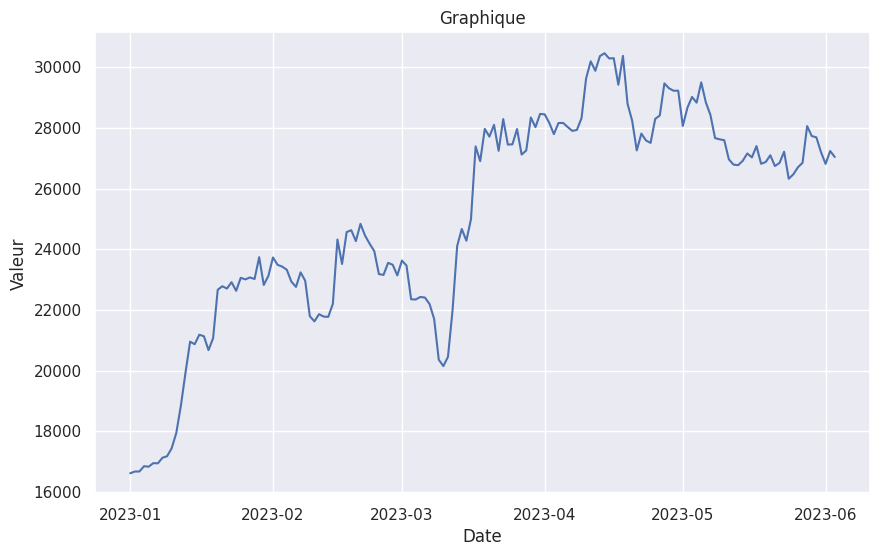

In [67]:
draw_graph(btc_data)

## `macd`

In [48]:
macd_calculated = macd(btc_data)

In [57]:
macd_calculated.head(3)

,MACD,Signal,Histogram
Time,,,
2023-01-01,0.000000,0.000000,0.000000
2023-01-02,4.476809,0.895362,3.581447
2023-01-03,8.117536,2.339797,5.777740


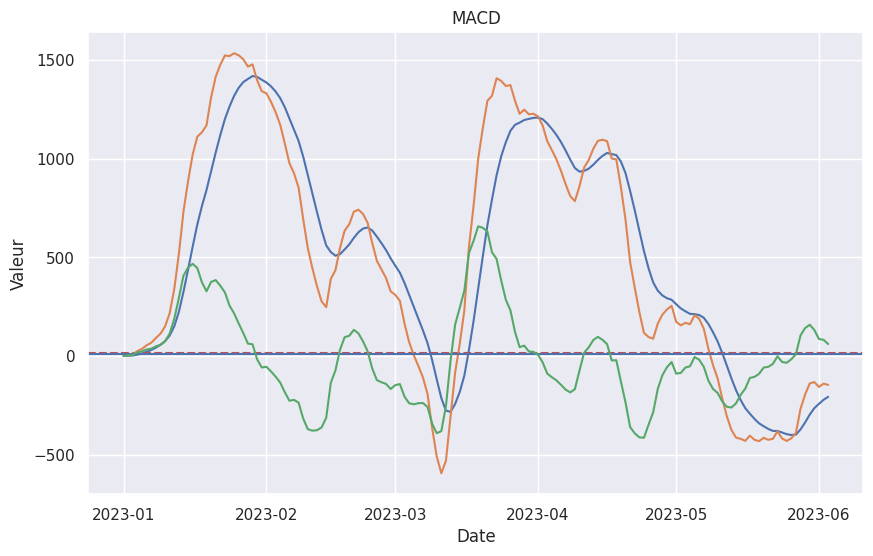

In [59]:
sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x=macd_calculated.index,y=macd_calculated["Signal"])
plt.axhline(y=15, color='r', linestyle='--')
sns.lineplot(x=macd_calculated.index,y=macd_calculated["MACD"])
plt.axhline(y=10, color='b', linestyle='-')
sns.lineplot(x=macd_calculated.index,y=macd_calculated["Histogram"])
plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.show()

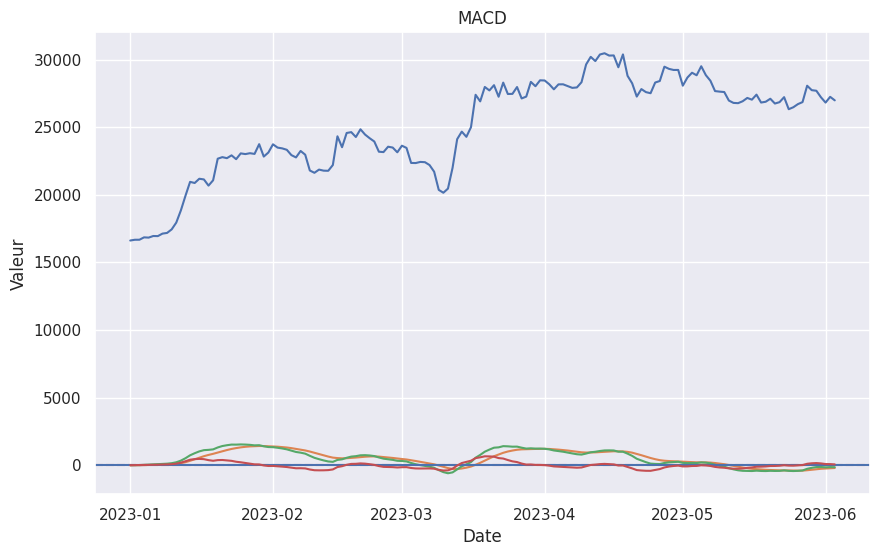

In [58]:
sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x=btc_data.index, y=btc_data["Close"])
sns.lineplot(x=macd_calculated.index,y=macd_calculated["Signal"])
plt.axhline(y=15, color='r', linestyle='--')
sns.lineplot(x=macd_calculated.index,y=macd_calculated["MACD"])
plt.axhline(y=10, color='b', linestyle='-')
sns.lineplot(x=macd_calculated.index,y=macd_calculated["Histogram"])
plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.show()

# `ADX`

In [68]:
adx_calculated = adx(btc_data)

In [69]:
adx_calculated.head(5)

,ADX,+DI,-DI
Time,,,
2023-01-01,NaN,NaN,NaN
2023-01-02,55.015390,68.347104,19.833952
2023-01-03,53.756314,57.629875,21.547096
2023-01-04,52.978843,58.336760,20.536516
2023-01-05,47.986812,38.778049,28.347649


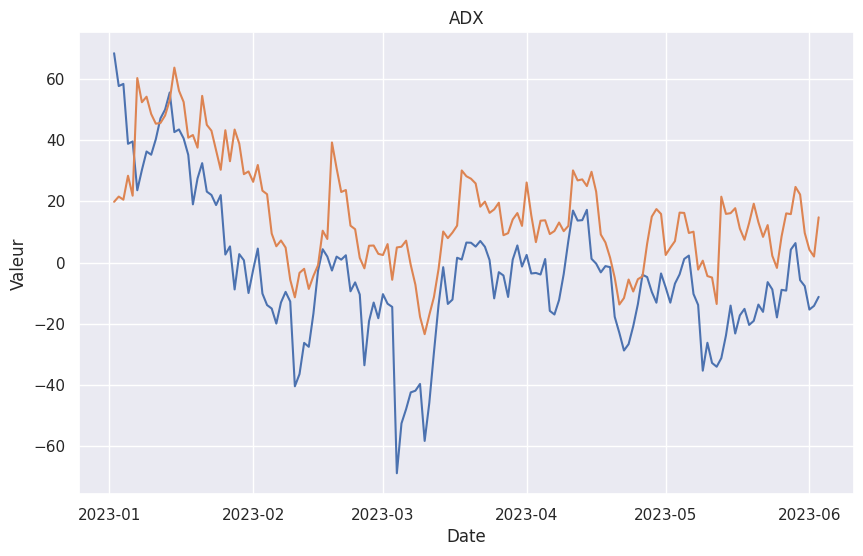

In [72]:
sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
#sns.lineplot(x=adx_calculated.index,y=adx_calculated["ADX"])
sns.lineplot(x=adx_calculated.index,y=adx_calculated["+DI"])
sns.lineplot(x=adx_calculated.index,y=adx_calculated["-DI"])
plt.title('ADX')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.show()

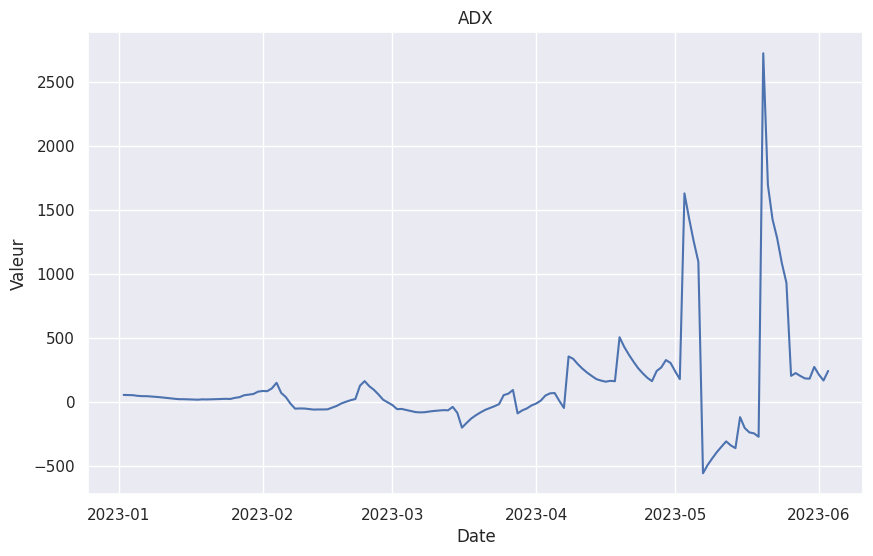

In [73]:
sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x=adx_calculated.index,y=adx_calculated["ADX"])
#sns.lineplot(x=adx_calculated.index,y=adx_calculated["+DI"])
#sns.lineplot(x=adx_calculated.index,y=adx_calculated["-DI"])
plt.title('ADX')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.show()